In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('C:/Users/chand/Downloads/Titanic/Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
df.dropna(inplace = True)
df.shape

(714, 3)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6433566433566433

In [10]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy'))

np.float64(0.6303208137715179)

In [28]:
kbin_age = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')

In [29]:
trf = ColumnTransformer(transformers=[
    ('first', kbin_age,[0]),
    ('Second',kbin_fare,[1])
])

In [30]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [31]:
trf.named_transformers_['first'].n_bins_

array([15])

In [32]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [33]:
output['age_labels'] = pd.cut(x = X_train['Age'],
                             bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = X_train['Fare'],
                              bins = trf.named_transformers_['Second'].bin_edges_[0].tolist())

In [34]:
 output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
184,4.0,0.0,22.0250,8.0,"(0.42, 6.0]","(18.75, 26.0]"
811,39.0,11.0,24.1500,8.0,"(38.0, 42.0]","(18.75, 26.0]"
27,19.0,3.0,263.0000,14.0,"(16.0, 19.0]","(108.9, 512.329]"
625,61.0,14.0,32.3208,11.0,"(54.0, 80.0]","(31.275, 51.479]"
395,22.0,4.0,7.7958,2.0,"(21.0, 23.0]","(7.775, 7.896]"


In [35]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [36]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [39]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy'))

np.float64(0.6373043818466354)

In [47]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize  =(14,4))
    plt.subplot(121)
    sns.histplot(X['Age'], kde = True)
    plt.title('Before')

    plt.subplot(122)
    sns.histplot(X_trf[:,0], color = 'red', kde = True)
    plt.title("After")

    plt.show()

C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6331181533646322


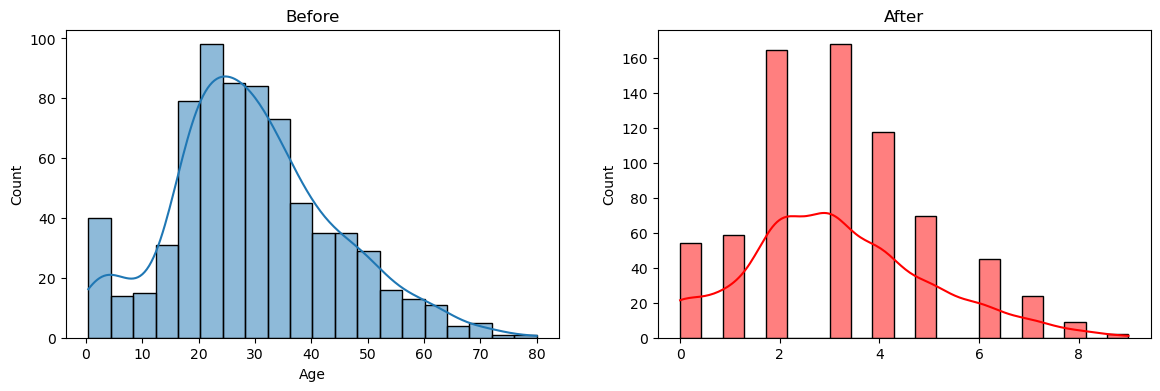

In [50]:
discretize(10,'kmeans')